In [1]:
import sys
sys.path.insert(0, '/home/wcmelby/Library/Python/wcmelby-HWP_Characterizations/')
from New_DRRP_Functions import *

In [3]:
60*90/20

270.0

In [22]:
def extract_intensities(reduced_filename, reduced_folder, lcenter, rcenter, maxradius, cutoff=5000):
    I_left = np.array([])
    I_right = np.array([])
    bad_indices = np.array([])
    times = np.linspace(0, 90, 270)

    for filename in sorted(os.listdir(reduced_folder), key = extract_number):
        if filename.startswith(reduced_filename):
            with fits.open(os.path.join(reduced_folder, filename)) as hdul:
                reduced_img_data = hdul[0].data
                ys, xs, = np.indices(reduced_img_data.shape)
                lradius = np.sqrt((ys-lcenter[0])**2+(xs-lcenter[1])**2)
                rradius = np.sqrt((ys-rcenter[0])**2+(xs-rcenter[1])**2)

                lbackground_mask = (lradius > 20) & (lradius < 26)
                rbackground_mask = (rradius > 20) & (rradius < 26)   # Index the background around each spot, take the median value

                background_lmedian = np.median(reduced_img_data[lbackground_mask])
                background_rmedian = np.median(reduced_img_data[rbackground_mask])

                lflux = np.sum(reduced_img_data[lradius < maxradius] - background_lmedian)   # Now take the flux with the background mask subtracted
                rflux = np.sum(reduced_img_data[rradius < maxradius] - background_rmedian)
                I_left = np.append(I_left, lflux)
                I_right = np.append(I_right, rflux)

                if lflux+rflux < cutoff:
                    print("Warning: low flux detected, check the image " + filename + ", index: " + str(sorted(os.listdir(reduced_folder), key = extract_number).index(filename)))
                    bad_indices = np.append(bad_indices, sorted(os.listdir(reduced_folder), key = extract_number).index(filename))
                else:
                    continue 

    # Makes the array a list of integers that can be used to index the other array
    bad_indices = bad_indices.astype(int)
    # Deletes the bad indices (caused by camera glitch or some other complication) from the data
    I_left = np.delete(I_left, bad_indices)
    I_right = np.delete(I_right, bad_indices)
    new_times = np.delete(times, bad_indices)

    return I_left, I_right, new_times, bad_indices

In [24]:
reduced_filename = 'Reduced_SuperK_'
reduced_folder = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/SuperK_Intensity/Reduced_SuperK_Intensity/First_Attempt_Reduced/"
lcenter = [316, 247]
rcenter = [316, 324]
maxradius = 20
cutoff = 50000

extracted_data = extract_intensities(reduced_filename, reduced_folder, lcenter, rcenter, maxradius, cutoff)
Il = extracted_data[0]
Ir = extracted_data[1]
times = extracted_data[2]


In [27]:
I = (Il+Ir)

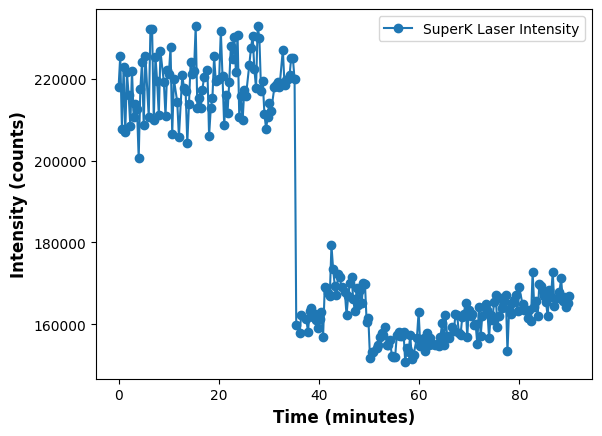

In [28]:
plt.ylabel('Intensity (counts)', fontsize=12, fontweight='bold')
plt.xlabel('Time (minutes)', fontsize=12, fontweight='bold')
plt.plot(times, I, marker='o', linestyle='-', label="SuperK Laser Intensity")
plt.legend()

folder_path = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/SuperK_Intensity"
file_name = 'SuperK_Laser_Stability.png'
#plt.savefig(folder_path + file_name, bbox_inches='tight', dpi=300)

Bring in data from the second attempt, 5/29/24

In [8]:
60*90/30

180.0

In [15]:
def extract_intensities2(reduced_filename, reduced_folder, lcenter, rcenter, maxradius, cutoff=5000):
    I_left = np.array([])
    I_right = np.array([])
    bad_indices = np.array([])
    times = np.linspace(0, 90, 180)

    for filename in sorted(os.listdir(reduced_folder), key = extract_number):
        if filename.startswith(reduced_filename):
            with fits.open(os.path.join(reduced_folder, filename)) as hdul:
                reduced_img_data = hdul[0].data
                ys, xs, = np.indices(reduced_img_data.shape)
                lradius = np.sqrt((ys-lcenter[0])**2+(xs-lcenter[1])**2)
                rradius = np.sqrt((ys-rcenter[0])**2+(xs-rcenter[1])**2)

                lbackground_mask = (lradius > 20) & (lradius < 26)
                rbackground_mask = (rradius > 20) & (rradius < 26)   # Index the background around each spot, take the median value

                background_lmedian = np.median(reduced_img_data[lbackground_mask])
                background_rmedian = np.median(reduced_img_data[rbackground_mask])

                lflux = np.sum(reduced_img_data[lradius < maxradius] - background_lmedian)   # Now take the flux with the background mask subtracted
                rflux = np.sum(reduced_img_data[rradius < maxradius] - background_rmedian)
                I_left = np.append(I_left, lflux)
                I_right = np.append(I_right, rflux)

                if lflux+rflux < cutoff:
                    print("Warning: low flux detected, check the image " + filename + ", index: " + str(sorted(os.listdir(reduced_folder), key = extract_number).index(filename)))
                    bad_indices = np.append(bad_indices, sorted(os.listdir(reduced_folder), key = extract_number).index(filename))
                else:
                    continue 

    # Makes the array a list of integers that can be used to index the other array
    bad_indices = bad_indices.astype(int)
    # Deletes the bad indices (caused by camera glitch or some other complication) from the data
    I_left = np.delete(I_left, bad_indices)
    I_right = np.delete(I_right, bad_indices)
    new_times = np.delete(times, bad_indices)

    return I_left, I_right, new_times, bad_indices

In [16]:
reduced_filename = 'Reduced_SuperK_'
reduced_folder = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/SuperK_Intensity/Reduced_SuperK_Intensity/Second_Attempt_Reduced/"
lcenter = [316, 247]
rcenter = [316, 324]
maxradius = 20
cutoff = 10000

extracted_data2 = extract_intensities2(reduced_filename, reduced_folder, lcenter, rcenter, maxradius, cutoff)
Il2 = extracted_data2[0]
Ir2 = extracted_data2[1]
times2 = extracted_data2[2]

In [20]:
I2 = (Il2+Ir2)

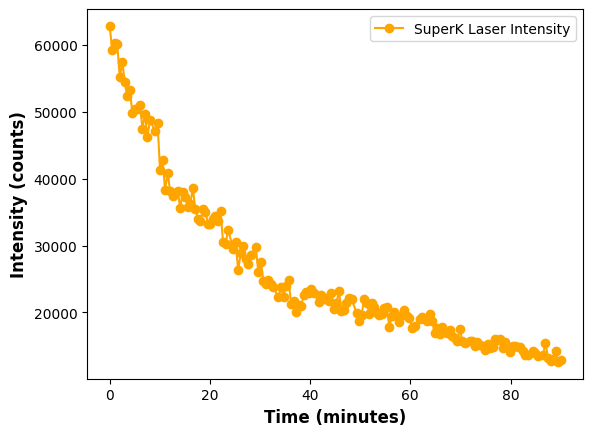

In [21]:
plt.ylabel('Intensity (counts)', fontsize=12, fontweight='bold')
plt.xlabel('Time (minutes)', fontsize=12, fontweight='bold')
plt.plot(times2, I2, marker='o', linestyle='-', color='orange', label="SuperK Laser Intensity")
plt.legend()

folder_path = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/SuperK_Intensity/"
file_name = '5_29_SuperK_Laser_Stability.png'
#plt.savefig(folder_path + file_name, bbox_inches='tight', dpi=300)

Now plot both together

Text(0.5, -0.1, 'Laser settings: 5%/5% power, 1600 nm. Camera settings: 490fps, 2ms tint, 5 images per data point. Time measured from when the laser was turned on.')

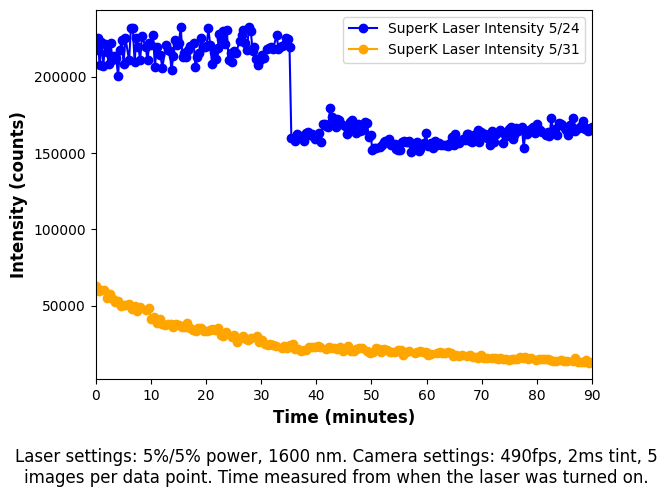

In [38]:
plt.xlim(0, 90)
plt.ylabel('Intensity (counts)', fontsize=12, fontweight='bold')
plt.xlabel('Time (minutes)', fontsize=12, fontweight='bold')
plt.plot(times, I, marker='o', linestyle='-', color='blue', label="SuperK Laser Intensity 5/24")
plt.plot(times2, I2, marker='o', linestyle='-', color='orange', label="SuperK Laser Intensity 5/31")
plt.legend()

caption = "Laser settings: 5%/5% power, 1600 nm. Camera settings: 490fps, 2ms tint, 5 images per data point. Time measured from when the laser was turned on."
plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=12)